In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
#read the csv file
sales = pd.read_csv("sales-by-day-11-20-03-10.csv")
#sales.drop is removes rows/column in dataset
#index[-1] is the last row
sales = sales.drop(sales.index[-1])
sales

,Date,Order Count,Gross Sales,(Discounts),Net Sales,Tips,Service Fees,Tax,Total Collected,(Refunds),(Processing),Net Total
0,"Sat, Nov 20th",44,$580.15,($0.00),$580.15,$39.00,$0.00,$51.50,$670.65,($15.24),($20.60),$634.81
1,"Sun, Nov 21st",35,$473.24,($0.00),$473.24,$35.00,$0.00,$42.00,$550.24,($10.88),($15.73),$523.63
2,"Mon, Nov 22nd",36,$374.99,($0.00),$374.99,$48.00,$0.00,$33.25,$456.24,($0.00),($13.95),$442.29
3,"Tue, Nov 23rd",27,$235.49,($0.00),$235.49,$23.78,$0.00,$20.87,$280.14,($0.00),($9.49),$270.65
4,"Wed, Nov 24th",0,$0.00,($0.00),$0.00,$0.00,$0.00,$0.00,$0.00,($0.00),($0.00),$0.00
5,"Thu, Nov 25th",0,$0.00,($0.00),$0.00,$0.00,$0.00,$0.00,$0.00,($0.00),($0.00),$0.00
6,"Fri, Nov 26th",0,$0.00,($0.00),$0.00,$0.00,$0.00,$0.00,$0.00,($0.00),($0.00),$0.00
7,"Sat, Nov 27th",27,$275.47,($0.00),$275.47,$5.00,$0.00,$24.45,$304.92,($19.85),($9.00),$276.07
8,"Sun, Nov 28th",36,$442.27,($0.00),$442.27,$2.00,$0.00,$39.30,$483.57,($0.00),($13.38),$470.19
9,"Mon, Nov 29th",47,$469.80,($0.00),$469.80,$0.00,$0.00,$41.85,$511.65,($4.36),($13.85),$493.44


In [3]:
#Create variable to store the rows that are duplicated
duplicated_rows = sales.duplicated()
#Filter out the duplicated rows
sales[duplicated_rows]

,Date,Order Count,Gross Sales,(Discounts),Net Sales,Tips,Service Fees,Tax,Total Collected,(Refunds),(Processing),Net Total
15,"Sat, Dec 4th",34,$319.98,($0.00),$319.98,$6.00,$0.00,$28.61,$354.59,($0.00),($10.75),$343.84
21,"Thu, Dec 9th",34,$313.75,($0.00),$313.75,$10.00,$0.00,$32.99,$356.74,($13.07),($10.09),$333.58


In [4]:
#Remove duplicated rows if there is any
#In this case the duplicated rows are 15, 21
sales = sales.drop_duplicates()
#Display the dataset after cleaning
sales.dtypes

Date               object
Order Count         int64
Gross Sales        object
(Discounts)        object
Net Sales          object
Tips               object
Service Fees       object
Tax                object
Total Collected    object
(Refunds)          object
(Processing)       object
Net Total          object
dtype: object

In [5]:
sales["Date"] = sales["Date"].str.replace("th","")
sales["Date"] = sales["Date"].str.replace("st","")
sales["Date"] = sales["Date"].str.replace("nd","")
sales["Date"] = sales["Date"].str.replace("rd","")
sales["Date"] = sales["Date"] + " 2021"

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [38]:
sales["Date"] = pd.to_datetime(sales["Date"], format = "%a, %b %d %Y")
sales.head()

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Order Count,Gross Sales,(Discounts),Net Sales,Tips,Service Fees,Tax,Total Collected,(Refunds),(Processing),Net Total
0,2021-11-20,44,580.15,($0.00),$580.15,39.00,$0.00,$51.50,$670.65,($15.24),($20.60),634.81
1,2021-11-21,35,473.24,($0.00),$473.24,35.00,$0.00,$42.00,$550.24,($10.88),($15.73),523.63
2,2021-11-22,36,374.99,($0.00),$374.99,48.00,$0.00,$33.25,$456.24,($0.00),($13.95),442.29
3,2021-11-23,27,235.49,($0.00),$235.49,23.78,$0.00,$20.87,$280.14,($0.00),($9.49),270.65
4,2021-11-24,0,0.00,($0.00),$0.00,0.00,$0.00,$0.00,$0.00,($0.00),($0.00),0.00


/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Text(0,0.5,'Net Total($)')

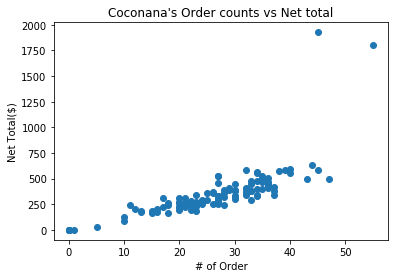

In [6]:
#Remove special characters to convert the value in the Net Total column 
#into the numeric value in order to graph
sales["Net Total"]= sales["Net Total"].str.replace("$", "")
sales["Net Total"]= sales["Net Total"].str.replace(",", "")
#Convert types of the column Net Total to float
sales["Net Total"] = sales["Net Total"].astype(float)
plt.scatter(x="Order Count", y ="Net Total", data = sales)
plt.title("Coconana's Order counts vs Net total")
plt.xlabel("# of Order")
plt.ylabel("Net Total($)")

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Tips amount by Net Total')

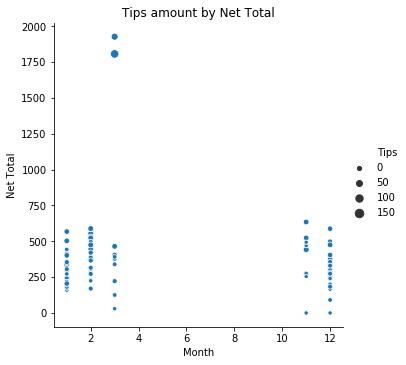

In [43]:
sales["Month"] = sales["Date"].dt.month
sns.relplot(x = "Month", y = "Net Total", size = "Tips", data = sales )
plt.title("Tips amount by Net Total")

Text(0,0.5,'Frequency')

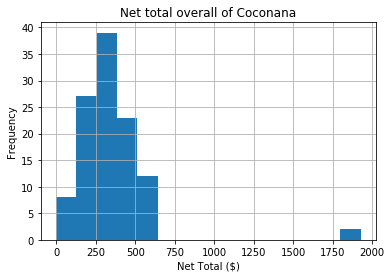

In [7]:
sales["Net Total"].hist(bins = 15)
plt.title("Net total overall of Coconana")
plt.xlabel("Net Total ($)")
plt.ylabel("Frequency")

In [8]:
sales["Tips"] = sales["Tips"].str.replace("$", "")
sales["Tips"] = sales["Tips"].astype(float)
lm = smf.ols("Tips ~ Q('Order Count') + Q('Net Total')", data=sales).fit()
lm.summary()


/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Tips   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     124.8
Date:                Mon, 16 May 2022   Prob (F-statistic):           8.43e-29
Time:                        15:11:55   Log-Likelihood:                -414.68
No. Observations:                 111   AIC:                             835.4
Df Residuals:                     108   BIC:                             843.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2130      2.761      0.439      0.661      -4.260       6.686
Q('Order Count')    -0.2385      0.139     -1.716      0.089      -0.514       0.037
Q('Net Total')       0.0690      0.006     11.965      0.000       0.058       0.080
==============================================================================
Omnibus:                        9.476   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               21.677
Skew:                          -0.094   Prob(JB):                     1.96e-05
Kurtosis:                       5.157   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Residuals')

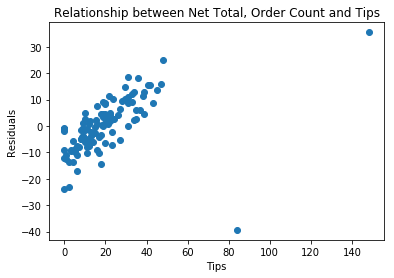

In [9]:
plt.scatter(x = sales["Tips"], y = lm.resid)
plt.title("Relationship between Net Total, Order Count and Tips")
plt.xlabel("Tips")
plt.ylabel("Residuals")

In [10]:
sales.head()

,Date,Order Count,Gross Sales,(Discounts),Net Sales,Tips,Service Fees,Tax,Total Collected,(Refunds),(Processing),Net Total
0,"Sat, Nov 20 2021",44,$580.15,($0.00),$580.15,39.00,$0.00,$51.50,$670.65,($15.24),($20.60),634.81
1,"Sun, Nov 21 2021",35,$473.24,($0.00),$473.24,35.00,$0.00,$42.00,$550.24,($10.88),($15.73),523.63
2,"Mon, Nov 22 2021",36,$374.99,($0.00),$374.99,48.00,$0.00,$33.25,$456.24,($0.00),($13.95),442.29
3,"Tue, Nov 23 2021",27,$235.49,($0.00),$235.49,23.78,$0.00,$20.87,$280.14,($0.00),($9.49),270.65
4,"Wed, Nov 24 2021",0,$0.00,($0.00),$0.00,0.00,$0.00,$0.00,$0.00,($0.00),($0.00),0.00


In [11]:
sales.dtypes

Date                object
Order Count          int64
Gross Sales         object
(Discounts)         object
Net Sales           object
Tips               float64
Service Fees        object
Tax                 object
Total Collected     object
(Refunds)           object
(Processing)        object
Net Total          float64
dtype: object

In [12]:
sales["Gross Sales"] = sales["Gross Sales"].str.replace("$", "")
sales["Gross Sales"] = sales["Gross Sales"].str.replace(",", "")
sales["Gross Sales"] = sales["Gross Sales"].astype(float)
sales.head()

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,Date,Order Count,Gross Sales,(Discounts),Net Sales,Tips,Service Fees,Tax,Total Collected,(Refunds),(Processing),Net Total
0,"Sat, Nov 20 2021",44,580.15,($0.00),$580.15,39.00,$0.00,$51.50,$670.65,($15.24),($20.60),634.81
1,"Sun, Nov 21 2021",35,473.24,($0.00),$473.24,35.00,$0.00,$42.00,$550.24,($10.88),($15.73),523.63
2,"Mon, Nov 22 2021",36,374.99,($0.00),$374.99,48.00,$0.00,$33.25,$456.24,($0.00),($13.95),442.29
3,"Tue, Nov 23 2021",27,235.49,($0.00),$235.49,23.78,$0.00,$20.87,$280.14,($0.00),($9.49),270.65
4,"Wed, Nov 24 2021",0,0.00,($0.00),$0.00,0.00,$0.00,$0.00,$0.00,($0.00),($0.00),0.00


In [13]:
x = sales[["Order Count", "Gross Sales", "Net Total"]]
y = sales["Tips"]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [16]:
#lab_enc = preprocessing.LabelEncoder()
#y_train = lab_enc.fit_transform(y_train)

In [17]:
knn5 = KNeighborsRegressor(n_neighbors = 5)
knn5.fit(x_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [18]:
y_test_pred = knn5.predict(x_test)


In [19]:
mean_squared_error(y_test_pred, y_test)

80.8716335652174

In [20]:
y_train_pred = knn5.predict(x_train)
mean_squared_error(y_train_pred, y_train)

140.44112172727273

In [21]:
knn3 = KNeighborsRegressor(n_neighbors = 3)
knn3.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [22]:
y_test_pred = knn3.predict(x_test)

In [23]:
mean_squared_error(y_test_pred,  y_test)

72.71931835748792

In [24]:
y_train_pred = knn3.predict(x_train)
mean_squared_error(y_train_pred, y_train)

69.81244823232323

In [25]:
knn10 = KNeighborsRegressor(n_neighbors = 10)
knn10.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [26]:
y_test_pred = knn10.predict(x_test)

In [27]:
mean_squared_error(y_test_pred, y_test)

71.20170991304347

In [28]:
y_train_pred = knn10.predict(x_train)
mean_squared_error(y_train_pred, y_train)

199.12742605681814

In [29]:
train_mses=[]
for k in range(1, 10):
    print("Now computing the MSE for k = ", k)
    iknn = KNeighborsRegressor(n_neighbors = k)
    iknn.fit(x_train, y_train)
    iknn_y_pred = iknn.predict(x_train)
    mse = mean_squared_error(iknn_y_pred, y_train)
    train_mses.append(mse)

Now computing the MSE for k =  1
Now computing the MSE for k =  2
Now computing the MSE for k =  3
Now computing the MSE for k =  4
Now computing the MSE for k =  5
Now computing the MSE for k =  6
Now computing the MSE for k =  7
Now computing the MSE for k =  8
Now computing the MSE for k =  9


In [30]:
mses=[]
for k in range(1, 10):
    print("Now computing the MSE for k = ", k)
    iknn = KNeighborsRegressor(n_neighbors = k)
    iknn.fit(x_train, y_train)
    iknn_y_pred = iknn.predict(x_test)
    mse = mean_squared_error(iknn_y_pred, y_test)
    mses.append(mse)

Now computing the MSE for k =  1
Now computing the MSE for k =  2
Now computing the MSE for k =  3
Now computing the MSE for k =  4
Now computing the MSE for k =  5
Now computing the MSE for k =  6
Now computing the MSE for k =  7
Now computing the MSE for k =  8
Now computing the MSE for k =  9


In [31]:
mses

[53.076613043478254,
 58.14490108695652,
 72.71931835748792,
 78.47683722826086,
 80.8716335652174,
 78.60307355072463,
 73.78137222715173,
 77.63367683423913,
 73.99093955984972]

Text(0,0.5,'MSE of train and test data')

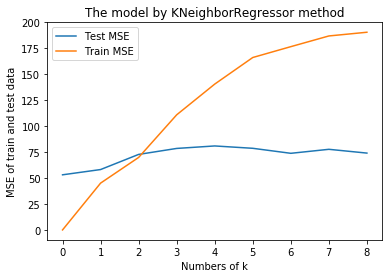

In [44]:
plt.plot(mses)
plt.plot(train_mses)
plt.legend(["Test MSE", "Train MSE"])
plt.title("The model by KNeighborRegressor method")
plt.xlabel("Numbers of k")
plt.ylabel("MSE of train and test data")

In [33]:
###The model is overfitting when k is at 0 to 3, after that the model becomes underfitting

In [34]:
mses_tree =[]
train_mses_tree = []
for k in range(1,10):
    ireg = DecisionTreeRegressor(max_depth = k)
    ireg.fit(x_train, y_train)
    ireg_y_pred = ireg.predict(x_test)
    ireg_y_train = ireg.predict(x_train)
    mse_train = mean_squared_error(ireg_y_train, y_train)
    mse_test = mean_squared_error(ireg_y_pred, y_test)
    mses_tree.append(mse_test)
    train_mses_tree.append(mse_train)
mses_tree

[137.19177282138406,
 83.65596662034339,
 76.16025332611385,
 72.71890203464675,
 61.91471861801976,
 67.15705503580055,
 68.37392865933815,
 77.06385753321256,
 72.37417826086957]

Text(0,0.5,'MSE of train and test data')

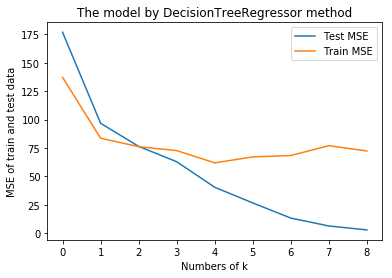

In [45]:
plt.plot(train_mses_tree)
plt.plot(mses_tree)
plt.legend(["Test MSE", "Train MSE"])
plt.title("The model by DecisionTreeRegressor method")
plt.xlabel("Numbers of k")
plt.ylabel("MSE of train and test data")

In [36]:
###The model is overfitting at k is 0 and 1, after that model becomes underfitting

Text(0.5,1,'The heatmap shows correlation between variables')

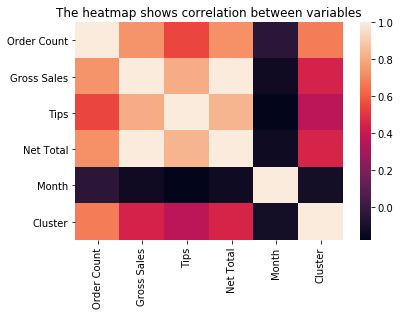

In [69]:
corr_matrix = sales.corr()
sns.heatmap(corr_matrix)
plt.title("The heatmap shows correlation between variables")

In [ ]:
#This time I choose the heatmap for analyzing the correlation between these variables. As the color gets brighter the correlation gets more positive

In [52]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [53]:
clusters = kmeans.predict(x)

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.4/site-packages/seaborn/distributions.py:290: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


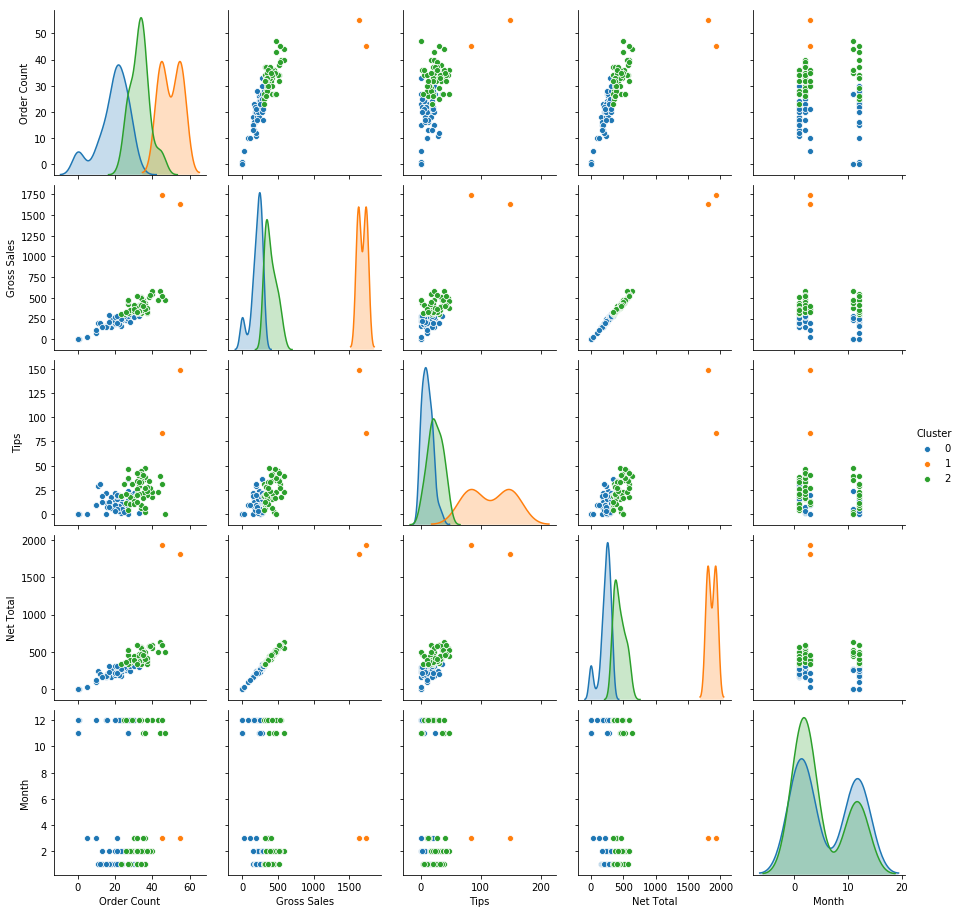

In [54]:
sales["Cluster"] = clusters
sns.pairplot(sales, hue = "Cluster")

Text(0.5,1,'The correlation of Order Count and Gross Sales')

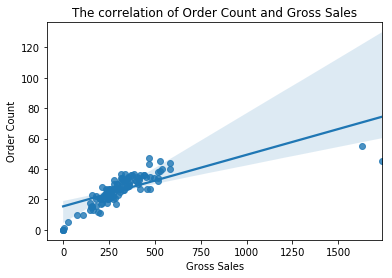

In [67]:
sns.regplot(x = "Gross Sales", y = "Order Count", data = sales)
plt.title("The correlation of Order Count and Gross Sales")

Text(0.5,1,'The different groups of each cluster')

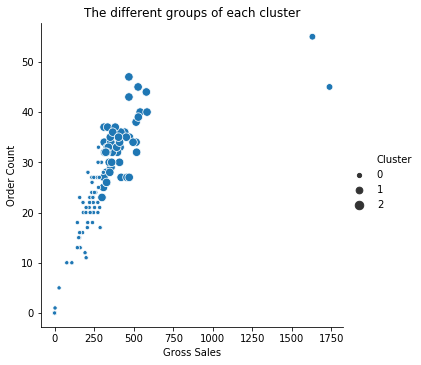

In [68]:
sns.relplot(x = "Gross Sales", y = "Order Count", size= "Cluster", data = sales)
plt.title("The different groups of each cluster")

In [ ]:
#This graph indicates the correlation of the Order Count and Gross Sales obviously positive which means the Gross Sales will increase whenever the Order Count is increasing. 